# Messages

In AutoGen AgentChat, messages facilitate communication and information exchange with other agents, orchestrators, and applications. AgentChat supports various message types, each designed for specific purposes.

At a high level, messages in AgentChat can be categorized into two types:
- agent-agent messages
- agent’s internal events and messages.

## 🏗️ Message Class Hierarchy Tree

```
BaseMessage (Abstract Root)
├── BaseChatMessage (Agent-to-Agent Communication)
│   ├── BaseTextChatMessage (Text-only messages)
│   │   ├── TextMessage
│   │   ├── StopMessage
│   │   ├── HandoffMessage
│   │   └── ToolCallSummaryMessage
│   ├── MultiModalMessage (Images + Text)
│   └── StructuredMessage (Custom structured data)
│
└── BaseAgentEvent (Observable Events)
    ├── ToolCallRequestEvent
    ├── ToolCallExecutionEvent
    ├── MemoryQueryEvent
    ├── UserInputRequestedEvent
    ├── ModelClientStreamingChunkEvent
    ├── ThoughtEvent
    ├── SelectSpeakerEvent
    ├── CodeGenerationEvent
    └── CodeExecutionEvent
```

## 📋 Complete Message Type Reference

| Message Type                   | Purpose                     | Key Fields                                         | Usage Example                          |
|---------------------------------|-----------------------------|----------------------------------------------------|-----------------------------------------|
| TextMessage                     | Basic text communication    | `content: str`                                     | Agent responses, user queries           |
| MultiModalMessage               | Images + text               | `content: str`, `images: List[Image]`              | Visual analysis, screenshots            |
| StopMessage                     | Conversation termination    | `content: str`                                     | End of conversation                     |
| HandoffMessage                  | Agent transfer              | `content: str`, `target: str`                      | Escalation to specialist                |
| ToolCallSummaryMessage          | Tool execution results      | `content: str`, `tool_calls: List[ToolCall]`       | API call results                        |
| ToolCallRequestEvent            | Tool execution request      | `tool_calls: List[FunctionCall]`                   | When agent wants to use tools           |
| ToolCallExecutionEvent          | Tool execution result       | `tool_calls: List[FunctionCall]`, `results: List[CodeResult]` | Tool execution outcomes          |
| MemoryQueryEvent                | Memory system interaction   | `content: str`                                     | Retrieving stored information           |
| UserInputRequestedEvent         | Requesting user input       | `content: str`                                     | When agent needs user clarification     |
| ModelClientStreamingChunkEvent  | Streaming responses         | `content: str`                                     | Real-time response generation           |
| ThoughtEvent                    | Agent reasoning             | `content: str`                                     | Internal agent thinking process         |
| SelectSpeakerEvent              | Speaker selection           | `content: List[str]`                               | Team coordination                       |
| CodeGenerationEvent             | Code creation               | `content: str`, `language: str`                    | Programming assistance                  |
| CodeExecutionEvent              | Code execution              | `content: str`, `result: CodeResult`               | Code running results                    |


## Agent-Agent Messages

AgentChat supports many message types for agent-to-agent communication. They belong to subclasses of the base class [BaseChatMessage](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.BaseChatMessage). Concrete subclasses covers basic text and multimodal communication, such as [TextMessage](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.TextMessage) and [MultiModalMessage](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.MultiModalMessage).

For example, the following code snippet demonstrates how to create a text message, which accepts a string content and a string source:

In [4]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Helll, world!", #
                           source ="User" # The name of the agent that sent this message.
                          )

text_message

TextMessage(id='6344c0d1-cc98-48b2-9f93-99684aded58b', source='User', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 27, 4, 20, 50, 249286, tzinfo=datetime.timezone.utc), content='Helll, world!', type='TextMessage')

In [7]:
import requests
from PIL import Image
from io import BytesIO
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage

pil_image = Image.open(
    BytesIO(requests.get("https://picsum.photos/300/200").content)
)

img = AGImage(pil_image)

multi_modal_msg = MultiModalMessage(
    content=["Can you describe the content of this image?",
            img],
    source="User"
)

multi_modal_msg

MultiModalMessage(id='da016187-aa4e-446a-90e0-9338cef6d446', source='User', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 27, 4, 26, 41, 612352, tzinfo=datetime.timezone.utc), content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x7ffa98193a70>], type='MultiModalMessage')


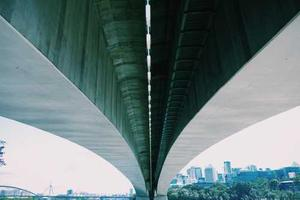

In [8]:
img

The `TextMessage` and `MultiModalMessage` we have created can be passed to agents directly via the [on_messages](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.ChatAgent.on_messages) method, or as tasks given to a team [run()](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.BaseGroupChat.run) method. Messages are also used in the responses of an agent. We will explain these in more detail in Agents and Teams.

## Internal Events

AgentChat also supports the concept of `events` - messages that are internal to an agent. These messages are used to communicate events and information on actions within the agent itself, and belong to subclasses of the base class [BaseAgentEvent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.BaseAgentEvent).


Examples of these include [ToolCallRequestEvent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.ToolCallRequestEvent), which indicates that a request was made to call a tool, and [ToolCallExecutionEvent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.ToolCallExecutionEvent), which contains the results of tool calls.

Typically, events are created by the agent itself and are contained in the [inner_messages](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.Response.inner_messages) field of the [Response](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.Response) returned from [on_messages](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.ChatAgent.on_messages). If you are building a custom agent and have events that you want to communicate to other entities (e.g., a UI), you can include these in the inner_messages field of the Response. We will show examples of this in Custom Agents.

You can read about the full set of messages supported in AgentChat in the [messages](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#module-autogen_agentchat.messages) module.

## Custom Message Types

You can create custom message types by subclassing the base class [BaseChatMessage](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.BaseChatMessage) or [BaseAgentEvent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.BaseAgentEvent). This allows you to define your own message formats and behaviors, tailored to your application. Custom message types are useful when you write custom agents.

### 🎯 When You Need to Customize Messages - Complete Decision Guide

Complete Decision Guide Critical Scenarios Requiring Custom Messages

1. **Rich Structured Data (Beyond Simple Text)**: When you need Complex data structures, validation, relationships

```python
# ❌ Won't work with TextMessage
"Patient John Doe, age 45, symptoms: fever, BP 120/80, medications: aspirin"

# ✅ Custom MedicalRecordMessage
MedicalRecordMessage(
    content="Patient consultation",
    medical_data=MedicalData(
        patient_id="P12345",
        symptoms=["fever", "cough"],
        vitals={"blood_pressure": "120/80", "temperature": 101.2},
        medications=[{"name": "aspirin", "dosage": "81mg"}]
    )
)
```

2. **Domain-Specific Protocols**: When you need Industry-standard formats, compliance requirements

```python
# Financial transaction with regulatory data
FinancialTransactionMessage(
    content="Wire transfer processed",
    transaction=TransactionData(
        transaction_id="TX789",
        amount=Decimal("5000.00"),
        compliance_flags=["AML_CHECKED", "KYC_VERIFIED"]
    )
)
```

3. **Integration with External APIs**: When you need Map to specific API schemas, webhook formats

```python
# Sensor data matching IoT platform schema
SensorDataMessage(
    content="Temperature alert",
    reading=SensorReading(
        sensor_id="TEMP-001",
        value=85.5,
        unit="Fahrenheit",
        timestamp="2024-01-15T14:30:00Z",
        metadata={"device_type": "DHT22", "firmware": "2.1.0"}
    )
)
```

4. **Workflow & State Management**: When you need Track complex state, approval chains, audit trails

```python
# Multi-step approval workflow
ApprovalRequestMessage(
    content="Budget approval needed",
    approval=ApprovalData(
        request_id="BUD-2024-001",
        current_approvals=2,
        required_approvals=3,
        approval_chain=["manager", "director", "cfo"],
        deadline=datetime(2024, 12, 31)
    )
)
```

In [10]:
from autogen_agentchat.messages import BaseChatMessage
from pydantic import BaseModel, Field
from typing import List, Optional
from datetime import datetime

class MedicalData(BaseModel):
    patient_id: str
    symptoms: List[str]
    diagnosis: Optional[str] = None
    medications: List[str] = []
    vital_signs: dict = {}
    timestamp: datetime = Field(default_factory=datetime.now)

class MedicalRecordMessage(BaseChatMessage):
    """Custom message for medical record communication between healthcare agents."""
    
    content: str  # Summary text
    medical_data: MedicalData
    
    def to_text(self) -> str:
        """Convert to human-readable text."""
        return f"Medical Record: {self.content}\nPatient: {self.medical_data.patient_id}\nSymptoms: {', '.join(self.medical_data.symptoms)}"
    
    def to_model_text(self) -> str:
        """Convert the content of the message to text-only representation.
        This is used for creating text-only content for models.."""
        return f"Medical record for patient {self.medical_data.patient_id}: {self.content}"
    
    def to_model_message(self):
        """Convert to model message format."""
        from autogen_core.models import UserMessage
        return UserMessage(
            content=self.to_model_text(),
            source=self.source
        )

# Usage example
medical_msg = MedicalRecordMessage(
    content="Patient presenting with fever and cough",
    medical_data=MedicalData(
        patient_id="P12345",
        symptoms=["fever", "cough", "fatigue"],
        diagnosis="Possible flu",
        medications=["ibuprofen"]
    ),
    source="TriageAgent"
)

medical_msg

MedicalRecordMessage(id='ea4508a5-f924-42e6-90b7-859710a58999', source='TriageAgent', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 27, 4, 43, 54, 810153, tzinfo=datetime.timezone.utc), content='Patient presenting with fever and cough', medical_data=MedicalData(patient_id='P12345', symptoms=['fever', 'cough', 'fatigue'], diagnosis='Possible flu', medications=['ibuprofen'], vital_signs={}, timestamp=datetime.datetime(2025, 7, 27, 11, 43, 54, 809560)))

In [11]:
medical_msg.to_text()

'Medical Record: Patient presenting with fever and cough\nPatient: P12345\nSymptoms: fever, cough, fatigue'

In [12]:
medical_msg.to_model_message()

UserMessage(content='Medical record for patient P12345: Patient presenting with fever and cough', source='TriageAgent', type='UserMessage')